In [50]:
import numpy as np
import pandas as pd
import subprocess
import os
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

In [51]:
assays = ['DNase', 'CTCF', 'H3K27ac', 'H3K4me3', 'H3K36me3', 'H3K27me3', 'H3K9me3', 'H3K4me1']
tissues = [124, 192, 213, 277, 323]
input_dir_epi = '/project/deeprna_data/epigept/corgi_benchmark/processed_predictions'
input_dir_corgi = '/project/deeprna_data/benchmark/test_tissues_tta_easytest'
regions = '/project/deeprna_data/epigept/corgi_benchmark/comparison/chr8_test_regions.bed'
outdir = '/project/deeprna_data/epigept/corgi_benchmark/comparison'

In [48]:
for tissue in tissues:
    for assay in assays:
        # If ground truth does not exist, skip.
        if tissue in [124, 192]:
            encode = f'{input_dir_corgi}/tissue{tissue}_{assay.lower()}_encode.bw'
            if not os.path.exists(encode):
                continue
        else:
            encode = f'/project/deeprna_data/benchmark/cross_both_tta/tissue{tissue}_{assay.lower()}_encode.bw'
            if not os.path.exists(encode):
                continue            
        
        # Epigept
        epigept = f'{input_dir_epi}/tissue_{tissue}_{assay}.bw'
        cmd = f'bwtool summary {regions} {epigept} {outdir}/tissue_{tissue}_{assay}_epigept.tsv -keep-bed -header'
        subprocess.run(cmd, shell=True)

        # Corgi
        if tissue in [124, 192]:
            corgi = f'{input_dir_corgi}/tissue{tissue}_{assay.lower()}_grt.bw'
            cmd = f'bwtool summary {regions} {corgi} {outdir}/tissue_{tissue}_{assay}_corgi.tsv -keep-bed -header'
            subprocess.run(cmd, shell=True)
    
            # ENCODE
            encode = f'{input_dir_corgi}/tissue{tissue}_{assay.lower()}_encode.bw'
            cmd = f'bwtool summary {regions} {encode} {outdir}/tissue_{tissue}_{assay}_encode.tsv -keep-bed -header'
            subprocess.run(cmd, shell=True)
        else:
            corgi = f'/project/deeprna_data/benchmark/cross_both_tta/tissue{tissue}_{assay.lower()}_grt.bw'
            cmd = f'bwtool summary {regions} {corgi} {outdir}/tissue_{tissue}_{assay}_corgi.tsv -keep-bed -header'
            subprocess.run(cmd, shell=True)
    
            # ENCODE
            encode = f'/project/deeprna_data/benchmark/cross_both_tta/tissue{tissue}_{assay.lower()}_encode.bw'
            cmd = f'bwtool summary {regions} {encode} {outdir}/tissue_{tissue}_{assay}_encode.tsv -keep-bed -header'
            subprocess.run(cmd, shell=True)            

No such file or directory
Can't open /project/deeprna_data/epigept/corgi_benchmark/processed_predictions/tissue_124_H3K4me3.bw to read
No such file or directory
Can't open /project/deeprna_data/epigept/corgi_benchmark/processed_predictions/tissue_124_H3K27me3.bw to read


In [52]:
df_dict = {'tissue':[], 'assay':[], 'model':[], 'pearson':[], 'spearman':[]}
for tissue in tissues:
    for assay in assays:
        # ENCODE
        encode = f'{outdir}/tissue_{tissue}_{assay}_encode.tsv'
        if not os.path.exists(encode):
            continue
        encode = pd.read_csv(encode, sep='\t')

        # Corgi
        corgi = f'{outdir}/tissue_{tissue}_{assay}_corgi.tsv'
        corgi = pd.read_csv(corgi, sep='\t')

        df_dict['tissue'].append(tissue)
        df_dict['assay'].append(assay)
        df_dict['model'].append('corgi')
        df_dict['pearson'].append(pearsonr(encode['mean'], corgi['mean'])[0])
        df_dict['spearman'].append(spearmanr(encode['mean'], corgi['mean'])[0])

        # Epigept
        epigept = f'{outdir}/tissue_{tissue}_{assay}_epigept.tsv'
        epigept = pd.read_csv(epigept, sep='\t')

        df_dict['tissue'].append(tissue)
        df_dict['assay'].append(assay)
        df_dict['model'].append('epigept')
        df_dict['pearson'].append(pearsonr(encode['mean'], epigept['mean'])[0])
        df_dict['spearman'].append(spearmanr(encode['mean'], epigept['mean'])[0])

In [53]:
df = pd.DataFrame(df_dict)

In [54]:
df

,tissue,assay,model,pearson,spearman
0,124,DNase,corgi,0.834477,0.885174
1,124,DNase,epigept,0.331642,0.804193
2,124,CTCF,corgi,0.837132,0.320800
3,124,CTCF,epigept,0.088144,0.088063
4,124,H3K27ac,corgi,0.661586,0.530378
5,124,H3K27ac,epigept,0.186165,0.127805
6,124,H3K4me3,corgi,0.888730,0.316161
7,124,H3K4me3,epigept,0.508578,0.141740
8,124,H3K27me3,corgi,0.508332,0.512063
9,124,H3K27me3,epigept,0.019323,0.014120


In [55]:
df.to_csv('/project/deeprna_data/epigept/corgi_benchmark/results2.csv')

In [56]:
df['assay_type'] = None
df.loc[df.assay == 'DNase', 'assay_type'] = 'DNase'
df.loc[df.assay == 'CTCF', 'assay_type'] = 'CTCF ChIP'
df.loc[~df.assay.isin(['DNase', 'CTCF']), 'assay_type'] = 'Histone ChIP'
df['model'] = df['model'].replace({'corgi': 'Corgi', 'epigept': 'EpiGePT'})

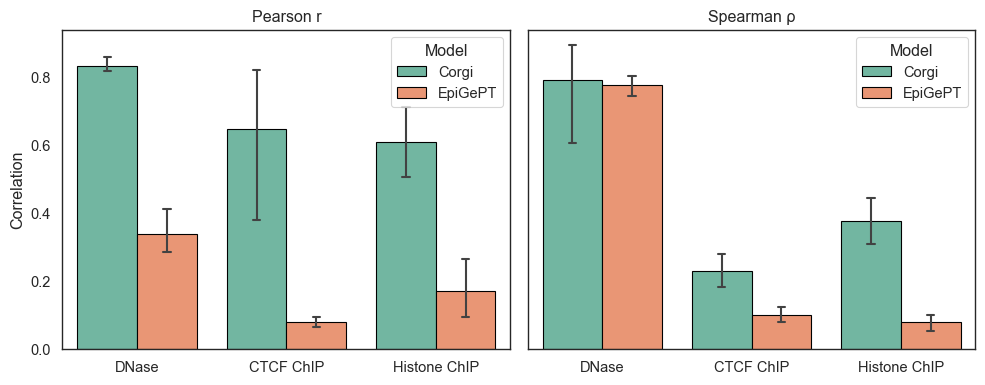

In [58]:
# Set the style
sns.set(style="white", context="paper", font_scale=1.2)

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Plot Pearson
sns.barplot(
    data=df,
    x="assay_type", y="pearson", hue="model",
    ax=axes[0],
    palette="Set2", edgecolor="black", capsize=0.1, err_kws={'linewidth': 1.5}
)
axes[0].set_title("Pearson r")
axes[0].set_ylabel("Correlation")
axes[0].set_xlabel("")
#axes[0].get_legend().remove()
axes[0].legend(title="Model", loc="upper right")

# Plot Spearman
sns.barplot(
    data=df,
    x="assay_type", y="spearman", hue="model",
    ax=axes[1],
    palette="Set2", edgecolor="black", capsize=0.1, err_kws={'linewidth': 1.5}
)
axes[1].set_title("Spearman ρ")
axes[1].set_ylabel("")
axes[1].set_xlabel("")
axes[1].legend(title="Model", loc="upper right")

# Tight layout and save
plt.tight_layout()
plt.savefig("model_comparison_correlation2.pdf", dpi=300, bbox_inches="tight")
plt.show()

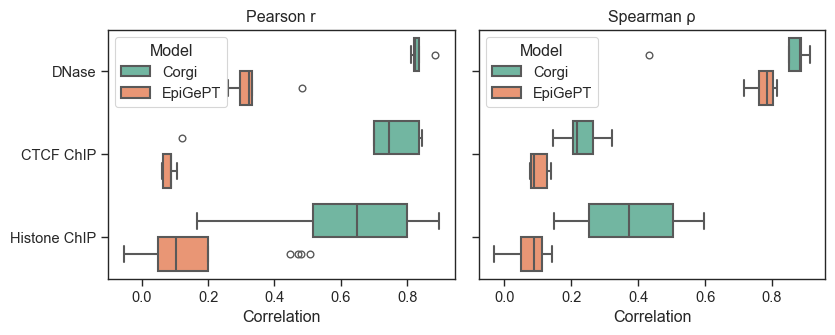

In [67]:
# Create the figure and axes
sns.set(style="ticks", context="paper", font_scale=1.2)

fig, axes = plt.subplots(1, 2, figsize=(8.5,3.5), sharey=True)

# Plot Pearson as horizontal boxplot
sns.boxplot(
    data=df,
    y="assay_type", x="pearson", hue="model",
    ax=axes[0],
    palette="Set2", linewidth=1.5
)
axes[0].set_title("Pearson r")
axes[0].set_xlabel("Correlation")
axes[0].set_ylabel("")
axes[0].legend(title="Model", loc="upper left")

# Plot Spearman as horizontal boxplot
sns.boxplot(
    data=df,
    y="assay_type", x="spearman", hue="model",
    ax=axes[1],
    palette="Set2", linewidth=1.5
)
axes[1].set_title("Spearman ρ")
axes[1].set_xlabel("Correlation")
axes[1].set_ylabel("")
axes[1].legend(title="Model", loc="upper left")

# Tight layout and save
plt.tight_layout()
plt.savefig("model_comparison_correlation2_boxplot.pdf", dpi=300, bbox_inches="tight")
plt.show()